In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from env import sql_connexion
import env

from sklearn.model_selection import train_test_split


# import acquire
import wrangle_no_acquire

# importing scalers to allow for scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

## ACQUIRE AND DATA PREP

In [2]:
# now obtaining the data from the created .csv because SQL is taking too long with the internet.

zil = pd.read_csv('zillow_single_family_properties_2017.csv')

In [3]:
# splitting acquired and prepared Zillow data into train, validate, test

train, validate, test = wrangle_no_acquire.wrangle_zillow(zil)

train.shape, validate.shape, test.shape

((1192919, 7), (511252, 7), (426043, 7))

In [4]:
# looking at what's in the cleaned dataframe

train.head()

,no_br,no_ba,area_sqft,tax_value,year_built,tax_amount,fips
369306,1.0,1.0,1018.0,39091.0,1942.0,621.20,6037.0
15453,2.0,1.0,840.0,188441.0,1922.0,2517.68,6037.0
188059,4.0,2.0,1948.0,385000.0,1943.0,6815.22,6037.0
87477,3.0,2.0,1320.0,181589.0,1954.0,2301.48,6037.0
2016553,2.0,2.0,2225.0,804692.0,1917.0,9855.70,6037.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1192919 entries, 369306 to 251481
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   no_br       1192919 non-null  float64
 1   no_ba       1192919 non-null  float64
 2   area_sqft   1192919 non-null  float64
 3   tax_value   1192919 non-null  float64
 4   year_built  1192919 non-null  float64
 5   tax_amount  1192919 non-null  float64
 6   fips        1192919 non-null  float64
dtypes: float64(7)
memory usage: 72.8 MB


**I'm deciding to have the number of bedrooms ('no_br') as the target variable, so this variable will not be scaled. It will be compared with the number of bathrooms ('no_br') and the house area in square feet ('area_sqft').**

## getting rid of outliers for train

In [6]:
# looking at the houses of more than 40 000 square feet

train[train.area_sqft > 30000]


,no_br,no_ba,area_sqft,tax_value,year_built,tax_amount,fips
1517873,4.0,3.5,31653.0,990852.0,2000.0,12137.74,6111.0
830510,3.0,2.0,59220.0,645043.0,1937.0,10401.55,6037.0
950854,12.0,15.0,35046.0,88020448.0,2002.0,1052070.50,6037.0
592153,11.0,0.0,31335.0,33367596.0,2007.0,399369.47,6037.0
1704145,8.0,11.0,35796.0,15971597.0,1991.0,192105.67,6037.0
1689332,1.0,0.0,531118.0,374376.0,1972.0,3737.82,6059.0
2135273,10.0,19.0,31415.0,6401936.0,1991.0,73571.72,6037.0
430684,3.0,1.0,37472.0,4003713.0,1956.0,13533.30,6037.0
401550,0.0,0.0,42831.0,29371867.0,2014.0,352319.61,6037.0
1327785,6.0,10.0,45891.0,54748308.0,2006.0,655557.04,6037.0


In [7]:
train = train[train.area_sqft <= 40000]
train.head()

,no_br,no_ba,area_sqft,tax_value,year_built,tax_amount,fips
369306,1.0,1.0,1018.0,39091.0,1942.0,621.20,6037.0
15453,2.0,1.0,840.0,188441.0,1922.0,2517.68,6037.0
188059,4.0,2.0,1948.0,385000.0,1943.0,6815.22,6037.0
87477,3.0,2.0,1320.0,181589.0,1954.0,2301.48,6037.0
2016553,2.0,2.0,2225.0,804692.0,1917.0,9855.70,6037.0


In [8]:
# dropping super-bathroom houses

train[train.no_ba > 10]


,no_br,no_ba,area_sqft,tax_value,year_built,tax_amount,fips
1327805,6.0,11.0,9386.0,4420833.0,1992.0,53341.73,6037.0
393782,6.0,11.0,11988.0,6069878.0,1986.0,68173.25,6037.0
423119,8.0,13.0,23114.0,13126550.0,1929.0,157793.90,6037.0
818240,8.0,16.0,19574.0,32767432.0,2005.0,392120.89,6037.0
754507,6.0,11.0,18183.0,7382338.0,2012.0,83158.79,6037.0
...,...,...,...,...,...,...,...
390932,9.0,13.0,12589.0,6603670.0,1932.0,79651.47,6037.0
481384,8.0,11.0,11843.0,2789504.0,2001.0,31438.33,6037.0
369101,7.0,12.0,8434.0,11740413.0,1932.0,140855.65,6037.0
241351,7.0,11.0,13019.0,6441090.0,2008.0,71740.59,6037.0


In [9]:
train = train[train.no_ba <= 10]
train.head()

,no_br,no_ba,area_sqft,tax_value,year_built,tax_amount,fips
369306,1.0,1.0,1018.0,39091.0,1942.0,621.20,6037.0
15453,2.0,1.0,840.0,188441.0,1922.0,2517.68,6037.0
188059,4.0,2.0,1948.0,385000.0,1943.0,6815.22,6037.0
87477,3.0,2.0,1320.0,181589.0,1954.0,2301.48,6037.0
2016553,2.0,2.0,2225.0,804692.0,1917.0,9855.70,6037.0


In [10]:
train.shape

(1192716, 7)

## MIN–MAX SCALING¶

In [11]:
# creating an instance of the min-max scaler in the jupyter notebook

mm_scal = MinMaxScaler()

In [12]:
# fitting the min-max scaler to the training data

mm_scal.fit(train[['no_ba', 'area_sqft']])

MinMaxScaler()

In [13]:
# make a new variable name so as to not overwrite the original data

mm_ba_sqft = mm_scal.transform(train[['no_ba', 'area_sqft']])

In [14]:
# looking at the feature variables BEFORE scaling

(train[['no_ba', 'area_sqft']]).head()

,no_ba,area_sqft
369306,1.0,1018.0
15453,1.0,840.0
188059,2.0,1948.0
87477,2.0,1320.0
2016553,2.0,2225.0


In [15]:
# looking at the feature variables AFTER scaling

mm_ba_sqft[:5]

array([[0.1       , 0.02714099],
       [0.1       , 0.02239065],
       [0.2       , 0.05196018],
       [0.2       , 0.03520056],
       [0.2       , 0.05935257]])

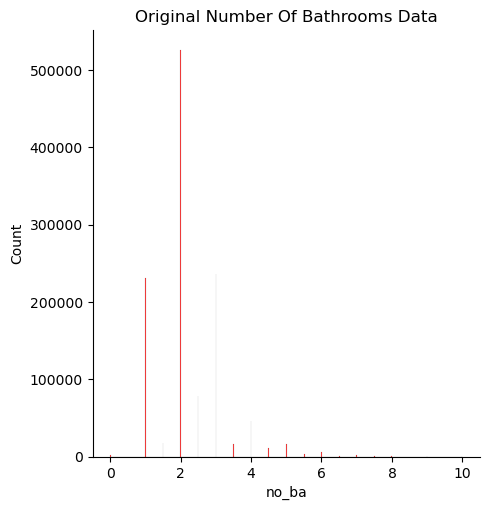

In [16]:
# plotting the data

sns.displot(train['no_ba'], color = 'red')

plt.title('Original Number Of Bathrooms Data')

plt.show()

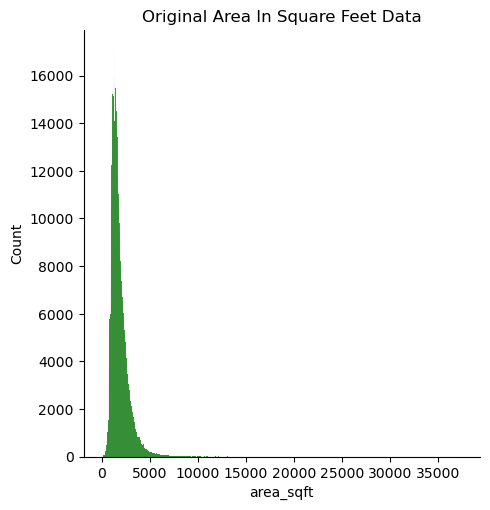

In [17]:
# plotting the data

sns.displot(train['area_sqft'], color = 'green')

plt.title('Original Area In Square Feet Data')

plt.show()

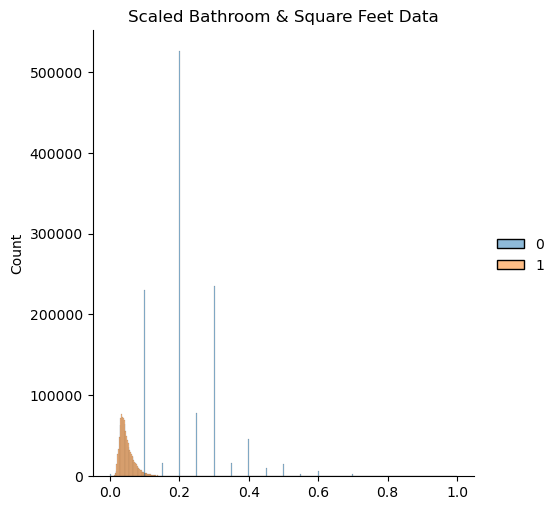

In [18]:
# plotting the scaled data

sns.displot(mm_ba_sqft)


plt.title('Scaled Bathroom & Square Feet Data')

plt.show()

## STANDART SCALING¶

In [19]:
ss_scal = StandardScaler()

# creating the std scaler in our notebook

In [20]:
# creating the scaler on the training dataset

ss_scal.fit(train[['no_ba', 'area_sqft']])

StandardScaler()

In [21]:
# make a new variable name so as to not overwrite the original data

ss_ba_sqft = ss_scal.transform(train[['no_ba', 'area_sqft']])
ss_ba_sqft[:5]

array([[-1.26048195, -0.88787515],
       [-1.26048195, -1.07541481],
       [-0.24235539,  0.09196693],
       [-0.24235539, -0.56968987],
       [-0.24235539,  0.38381237]])

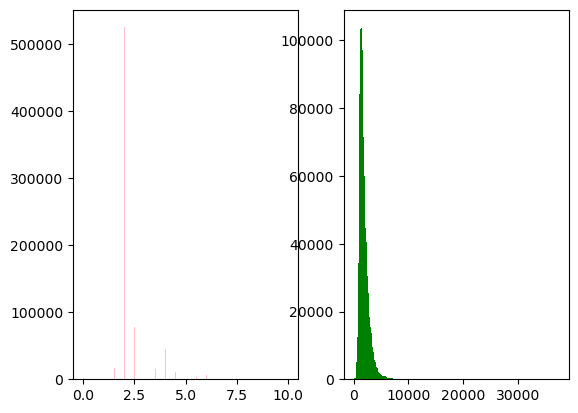

In [22]:
# Plotting the feature variables before scaling

plt.subplot(121)
plt.hist(train[['no_ba']], bins = 300, color = 'pink')

plt.subplot(122)
plt.hist(train[['area_sqft']], bins = 300, color = 'green')

plt.show()


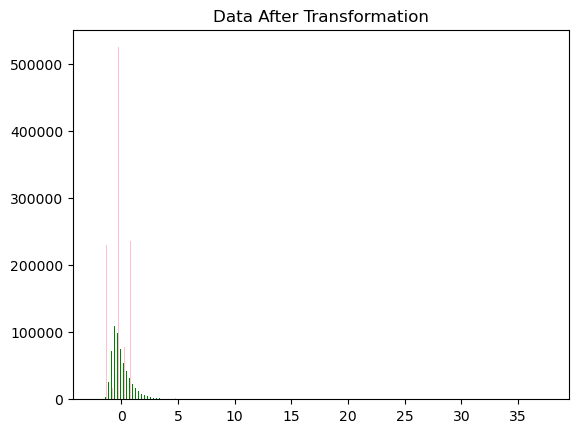

In [23]:
# Plotting the feature variables after scaling

plt.hist(ss_ba_sqft, bins = 300, color = ['pink', 'green'])
plt.title('Data After Transformation')
plt.show()

In [24]:
# creating a function for the plotting

def original_transformed_plots(transformed_data, original_data = train[['no_ba', 'area_sqft']]):
    plt.subplot
    plt.hist(original_data[['no_ba']], bins = 300, color = 'pink')
    plt.title('Number Of Bathrooms Before Scaling')
    plt.show()
    
    plt.subplot
    plt.hist(train[['area_sqft']], bins = 300, color = 'green')
    plt.title('Area In Square Feet Before Scaling')
    plt.show()
    
    plt.subplot
    plt.hist(ss_ba_sqft, bins = 300, color = ['pink', 'green'])
    plt.title('Data After Transformation')
    plt.show()

## ROBUST SCALING

In [25]:
rs_scal = RobustScaler()

In [26]:
# fitting the robust scaler

rs_scal.fit(train[['no_ba', 'area_sqft']])


RobustScaler()

In [27]:
# transform the training dataset

rs_br_sqft = rs_scal.transform(train[['no_ba', 'area_sqft']])

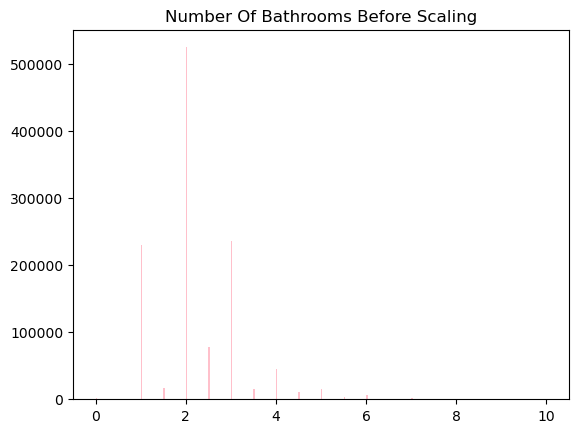

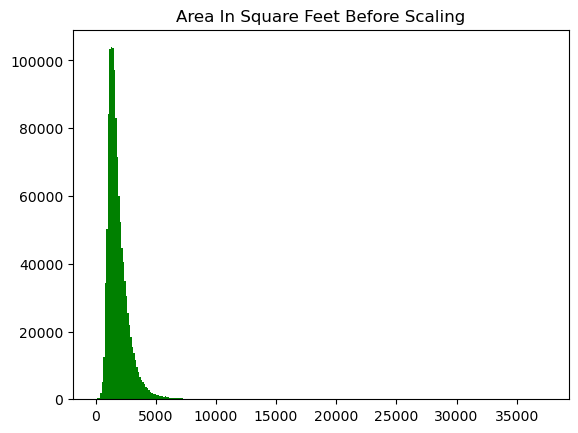

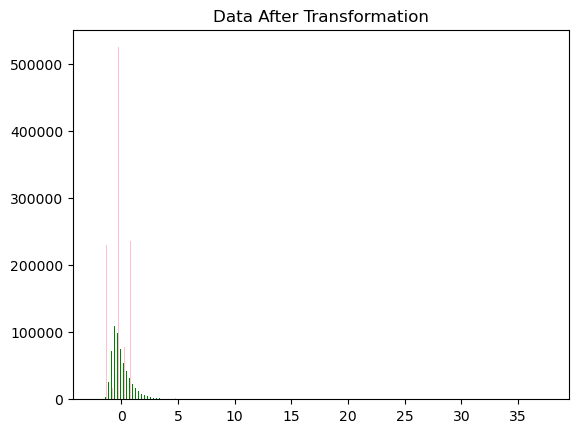

In [28]:
# using the plotting function to visualise the data

original_transformed_plots(rs_br_sqft)

In [29]:
# looking at the transformed data
br_sqft = rs_br_sqft
br_sqft[:10]

array([[-1.        , -0.63722397],
       [-1.        , -0.82439537],
       [ 0.        ,  0.34069401],
       [ 0.        , -0.31966351],
       [ 0.        ,  0.63196635],
       [-1.        , -0.61724501],
       [ 1.        ,  1.16403785],
       [ 0.        ,  0.11671924],
       [ 0.5       ,  0.88433228],
       [ 1.        ,  1.56782334]])

In [30]:
# turning it into a dataframe because why not ?

pd.DataFrame(br_sqft)

,0,1
0,-1.0,-0.637224
1,-1.0,-0.824395
2,0.0,0.340694
3,0.0,-0.319664
4,0.0,0.631966
...,...,...
1192711,0.0,-0.443743
1192712,3.0,3.525762
1192713,0.5,-0.268139
1192714,0.0,-0.114616


##  .inverse_transform 

In [31]:
train[['no_br', 'area_sqft']].head(10)

# looking at the original data

,no_br,area_sqft
369306,1.0,1018.0
15453,2.0,840.0
188059,4.0,1948.0
87477,3.0,1320.0
2016553,2.0,2225.0
76381,3.0,1037.0
1954232,4.0,2731.0
659359,4.0,1735.0
1182609,3.0,2465.0
1177653,4.0,3115.0


In [68]:
rs_scal.inverse_transform(br_sqft)[:10]

# the -1s are 1s, the 0s are 2s, the 0.5 is 2.5, there's a big change but it's not consistent across the data

# it's like they were doubled, and made positive. Sometimes.

# it appears to be, in some cases, the original data, at least for the area_sqft column

array([[1.000e+00, 1.018e+03],
       [1.000e+00, 8.400e+02],
       [2.000e+00, 1.948e+03],
       [2.000e+00, 1.320e+03],
       [2.000e+00, 2.225e+03],
       [1.000e+00, 1.037e+03],
       [3.000e+00, 2.731e+03],
       [2.000e+00, 1.735e+03],
       [2.500e+00, 2.465e+03],
       [3.000e+00, 3.115e+03]])

## Quantile Transformer

In [33]:
from sklearn.preprocessing import QuantileTransformer

In [41]:
qtransf = QuantileTransformer()


In [43]:
qtransf.fit(train[['no_ba']])

QuantileTransformer()

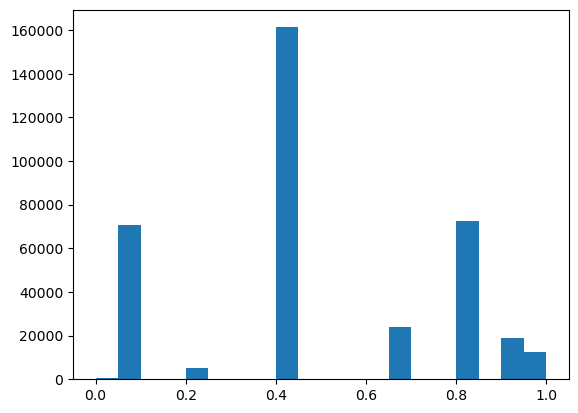

In [45]:
qt_zil = qtransf.transform(train[['no_ba']])
plt.hist(qt_zil, bins = 20)
plt.show()

In [54]:
train['no_ba'] = pd.Series(qtransf.fit_transform(np.array(train['no_ba']).reshape(-1, 1))[:,0])
train['no_ba'].head()

369306     0.431932
15453      0.814815
188059          NaN
87477           NaN
2016553         NaN
Name: no_ba, dtype: float64

## Use the QuantileTransformer, but omit the output_distribution argument.

In [65]:
# in-class example.
# I  haven't got it to work yet

def robust_scaler(X_train, X_validate, X_test):
    
    r_scaler = RobustScaler()
    r_scaler.fit(X_train)
    
    X_train_scaled = r_scaler.transform(X_train)
    X_validate_scaled = r_scaler.transform(X_validate)
    X_test_scaled = r_scaler.transform(X_test)
    
    return X_train_scaled, X_validate_scaled,  X_test_scaled

In [67]:
X_train, y_train, X_validate, y_validate, X_test, y_test = .... # something else goes here

SyntaxError: invalid syntax (1155882692.py, line 1)